<a href="https://colab.research.google.com/github/yabbou/python-data-science/blob/main/project_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Dimensionality Reduction & Feature Selection Project**
==

Introduction
==

Research Question:
To what extent can the independent variables predict the **average miles/gallon (MPG)** for a city car?

Variables: The original data set includes 10 categorical variables and 16 numerical variables. There are 25 variables for independent variables. The `city-mpg` variable will serve as the dependent variable for our regression model.

Part 2: EDA
==

Detailed here: https://archive.ics.uci.edu/ml/datasets

1. **symboling**: the degree which is more risky than its price indicates. It ranges from -3 (safer) to 3 (more risky). 
2. **normalized-losses**: as compared to other cars. It is the relative, average loss payment per insured vehicle year. This value is normalized for all autos within a particular size classification (two-door small, station wagons, sports/specialty, etc.), and represents the average loss per car per year. In this case, the range of normalized_losses is from 65 to 256.

3. **make**: The makers of the brand. In this dataset-- alfa-romero, audi, bmw, chevrolet, dodge, honda, isuzu, jaguar, mazda, mercedes-benz, mercury, mitsubishi, nissan, peugot, plymouth, porsche, renault, saab, subaru, toyota, volkswagen, volvo

4. **fuel-type**: diesel, gas.

5. **aspiration**: std, turbo.
6. **num-of-doors**: four, two.
7. **body-style**: hardtop, wagon, sedan, hatchback, convertible.
8. **drive-wheels**: 4wd, fwd, rwd.
9. **engine-location**: front, rear.
10. **wheel-base**:the distance between the centers of the front and rear wheels (continuous from 86.6 120.9).

11. **length**: continuous from 141.1 to 208.1.
12. **width**: continuous from 60.3 to 72.3.
13. **height**: continuous from 47.8 to 59.8.
14. **curb-weight**: the weight of an automobile without occupants or baggage (continuous from 1488 to 4066).
15. **engine-type**: dohc, dohcv, l, ohc, ohcf, ohcv, rotor.
16. **num-of-cylinders**: eight, five, four, six, three, twelve, two.
17. **engine-size**: continuous from 61 to 326.
18. **fuel-system**: 1bbl, 2bbl, 4bbl, idi, mfi, mpfi, spdi, spfi.
19. **bore**: size of cylinder for each car (continuous from 2.54 to 3.94).
20. **stroke**: the distance travelled by the piston in each cycle, continuous from 2.07 to 4.17.
21. **compression-ratio**: the ratio of the maximum to minimum volume in the cylinder of an internal combustion engine (continuous from 7 to 23).
22. **horsepower**: engine's power of each car (continuous from 48 to 288).
23. **peak-rpm**: the maximum revolutions per minute (continuous from 4150 to 6600).
24. **city-mpg**: continuous from 13 to 49. **THE TARGET VARIABLE**
25. **highway-mpg**: continuous from 16 to 54.
26. **price**: continuous from 5118 to 45400.

In [18]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

cars_df = pd.read_csv("https://raw.githubusercontent.com/MatthewFried/Udemy/master/Day3/Day3%20Data.csv")
cars_df.head()

,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9,111,5000,21,27,13495
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450
4,2,?,audi,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,53.1,2507,ohc,five,136,mpfi,3.19,3.4,8.5,110,5500,19,25,15250


Our data appears to have been gathered by less-than-professional data records. One column is unknown, others column names are numbers, others are shortened forms of likely common technical car terms. 

Let's first clarify the column names, based on the website data.

In [19]:
cars_df = pd.read_csv("https://raw.githubusercontent.com/MatthewFried/Udemy/master/Day3/Day3%20Data.csv", names=['Symboling', 'Normalized_Losses', 'Make', 'Fuel_Type','Aspiration','Num_Doors','Body_Style', 'Drive_Wheels','Engine_Location','Wheel_Base', 'Length','Width','Height','Curb_Weight','Engine_Type','Num_Cylinders','Engine_Size','Fuel_System','Bore','Stroke','Compression_Ratio', 'Horsepower','Peak_RPM','City_MPG','Highway_MPG','Price'])
cars_df.head()

,Symboling,Normalized_Losses,Make,Fuel_Type,Aspiration,Num_Doors,Body_Style,Drive_Wheels,Engine_Location,Wheel_Base,Length,Width,Height,Curb_Weight,Engine_Type,Num_Cylinders,Engine_Size,Fuel_System,Bore,Stroke,Compression_Ratio,Horsepower,Peak_RPM,City_MPG,Highway_MPG,Price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


Though, _understanding_ the column names still requires expert domain knoweldge, which still must be obtained.

In the meantime, what are the unique values in our data? Any out of the ordinary?

In [20]:
def displayUnique():
  COLS = cars_df.columns
  for x in range(COLS.shape[0]):
    print(COLS[x])
    print(np.unique(cars_df.iloc[:,x].sort_values(ascending=False)),'\n')
displayUnique()

Symboling
[-2 -1  0  1  2  3] 

Normalized_Losses
['101' '102' '103' '104' '106' '107' '108' '110' '113' '115' '118' '119'
 '121' '122' '125' '128' '129' '134' '137' '142' '145' '148' '150' '153'
 '154' '158' '161' '164' '168' '186' '188' '192' '194' '197' '231' '256'
 '65' '74' '77' '78' '81' '83' '85' '87' '89' '90' '91' '93' '94' '95'
 '98' '?'] 

Make
['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'mazda' 'mercedes-benz' 'mercury' 'mitsubishi' 'nissan' 'peugot'
 'plymouth' 'porsche' 'renault' 'saab' 'subaru' 'toyota' 'volkswagen'
 'volvo'] 

Fuel_Type
['diesel' 'gas'] 

Aspiration
['std' 'turbo'] 

Num_Doors
['?' 'four' 'two'] 

Body_Style
['convertible' 'hardtop' 'hatchback' 'sedan' 'wagon'] 

Drive_Wheels
['4wd' 'fwd' 'rwd'] 

Engine_Location
['front' 'rear'] 

Wheel_Base
[ 86.6  88.4  88.6  89.5  91.3  93.   93.1  93.3  93.7  94.3  94.5  95.1
  95.3  95.7  95.9  96.   96.1  96.3  96.5  96.6  96.9  97.   97.2  97.3
  98.4  98.8  99.1  99.2  99.4  99.5  

Note: some numeric columns store their numbers as strings. May require conversion to int.

Let's visualize some of the column correlations.

['Normalized_Losses', 'Make', 'Fuel_Type', 'Aspiration', 'Num_Doors', 'Body_Style', 'Drive_Wheels', 'Engine_Location', 'Engine_Type', 'Num_Cylinders', 'Fuel_System', 'Bore', 'Stroke', 'Horsepower', 'Peak_RPM', 'Price']


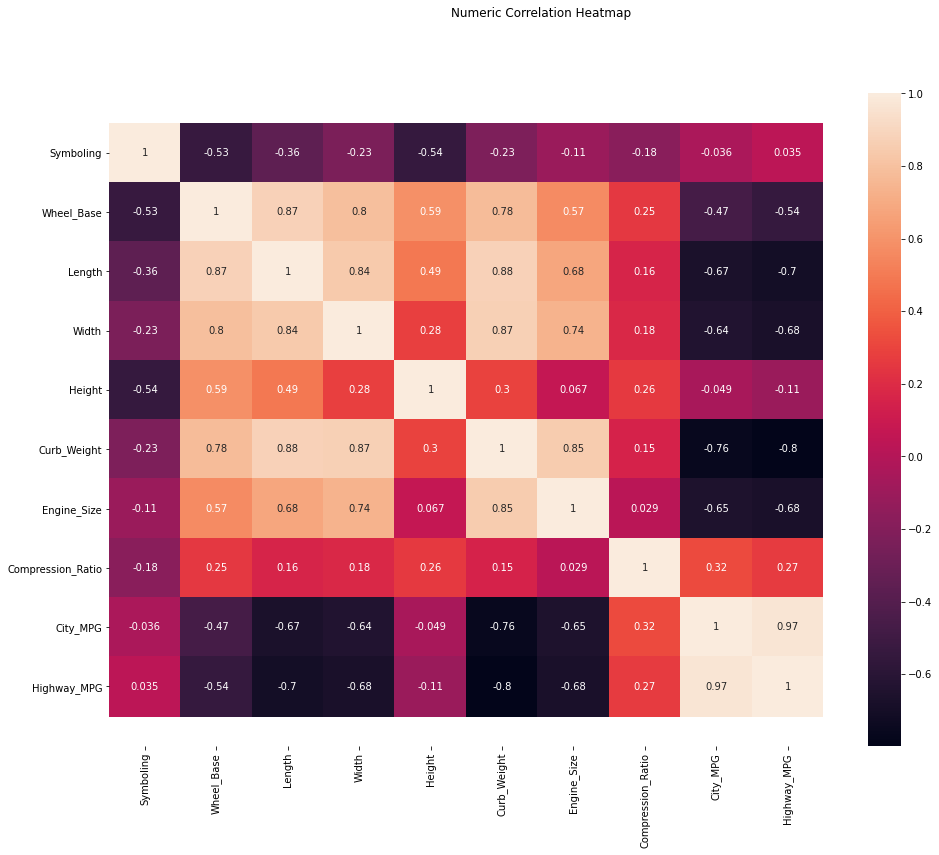

In [21]:
categorical_columns = []
FIRST_NON_NULL_ROW = 3
for col in cars_df:
  column_type = type(cars_df.loc[FIRST_NON_NULL_ROW, col])
  if column_type == str:
    categorical_columns.append(col)
print(categorical_columns)

fig = plt.figure(figsize=(16, 12)) 
corr = cars_df.copy().corr() 
sns.heatmap(corr, annot=True)

b, t = plt.ylim()
b += 0.5 
t -= 0.5 
plt.ylim(b, t) 
fig.suptitle('Numeric Correlation Heatmap') #make acc
plt.show()

Part 3: Data Cleaning
==

Nulls?

In [22]:
cars_df = cars_df.replace('?',np.NAN)
null_count = cars_df.isnull().sum()

print('Columns with null values:', [col for col in cars_df if cars_df.loc[:,col].isnull().sum()>0],'\n')

print(null_count,'\n')
print(null_count/len(cars_df) *100)

Columns with null values: ['Normalized_Losses', 'Num_Doors', 'Bore', 'Stroke', 'Horsepower', 'Peak_RPM', 'Price'] 

Symboling             0
Normalized_Losses    41
Make                  0
Fuel_Type             0
Aspiration            0
Num_Doors             2
Body_Style            0
Drive_Wheels          0
Engine_Location       0
Wheel_Base            0
Length                0
Width                 0
Height                0
Curb_Weight           0
Engine_Type           0
Num_Cylinders         0
Engine_Size           0
Fuel_System           0
Bore                  4
Stroke                4
Compression_Ratio     0
Horsepower            2
Peak_RPM              2
City_MPG              0
Highway_MPG           0
Price                 4
dtype: int64 

Symboling             0.00000
Normalized_Losses    20.00000
Make                  0.00000
Fuel_Type             0.00000
Aspiration            0.00000
Num_Doors             0.97561
Body_Style            0.00000
Drive_Wheels          0.00000
Engin

Thankfully, the nulls appear to correlate (besides for the `Normalized Losses`).

Part 4: Feature Selection and Dimension Reduction
==

Validation
==